In [2]:
import os, sys

import numpy as np
import pandas as pd
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
plt.rc('mathtext', fontset="cm")
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
  sys.path.append(module_path)

from utils.utils import Create_Similarity_Model

sns.set_style('whitegrid')
sns.set_context("talk")

2022-07-21 15:30:04.185078: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-21 15:30:04.185094: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Now we will create our model

In [3]:
n_nonsimilar = 1
n_similar = 1

### We will look for similarity in the last n_similar parameters of the inputs.

## Load the MVP data for high enough Re

In [4]:
dfSB75k_M=pd.read_csv("../../Data/McKeon Data/turb2/Re75000.txt",  sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB150k_M=pd.read_csv("../../Data/McKeon Data/turb2/Re150000.txt",  sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB230k_M=pd.read_csv("../../Data/McKeon Data/turb2/Re230000.txt",  sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB310k_M=pd.read_csv("../../Data/McKeon Data/turb2/Re310000.txt",  sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB410k_M=pd.read_csv("../../Data/McKeon Data/turb2/Re410000.txt",  sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB540k_M=pd.read_csv("../../Data/McKeon Data/turb2/Re540000.txt",  sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB750k_M=pd.read_csv("../../Data/McKeon Data/turb2/Re750000.txt",  sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB1M_M=pd.read_csv("../../Data/McKeon Data/turb2/Re1000000.txt",  sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB1M300k_M=pd.read_csv("../../Data/McKeon Data/turb2/Re1300000.txt",  sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB1M700k_M=pd.read_csv("../../Data/McKeon Data/turb2/Re1700000.txt",  sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB2M300k_M=pd.read_csv("../../Data/McKeon Data/turb2/Re2300000.txt",  sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB3M_M=pd.read_csv("../../Data/McKeon Data/turb2/Re3000000.txt", sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB4M_M=pd.read_csv("../../Data/McKeon Data/turb2/Re4000000.txt", sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB6M_M=pd.read_csv("../../Data/McKeon Data/turb2/Re6000000.txt", sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB7M_M=pd.read_csv("../../Data/McKeon Data/turb2/Re7000000.txt", sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB10M_M=pd.read_csv("../../Data/McKeon Data/turb2/Re10000000.txt", sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB13M_M=pd.read_csv("../../Data/McKeon Data/turb2/Re13000000.txt", sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])

dfs = [dfSB75k_M, dfSB150k_M, dfSB230k_M, dfSB310k_M, dfSB410k_M, dfSB540k_M, dfSB750k_M, dfSB1M_M, dfSB1M300k_M]
#dfs = [dfSB2M300k_M, dfSB3M_M, dfSB4M_M, dfSB6M_M, dfSB7M_M, dfSB10M_M, dfSB13M_M]
Re_tau = []
Y_ = []
U_ = []
possible_re_tau = [1824.7, 3327.4, 5108.6, 6617.4, 8536.6, 10914.0, 14849.0, 19778.0, 25278.0]
#possible_re_tau = [4.229500e+004, 5.453000e+004, 7.647800e+004, 1.022e+005, 1.279200e+005, 1.657e+005, 2.169800e+005]
dic_x = {}
dic_y = {}

for i in range(len(possible_re_tau)):
    possible_y = dfs[i]["y+"].values
    possible_u = dfs[i]["U+"].values
    for j in range(len(possible_y)):                                                                    
        if 3 * (possible_re_tau[i] ** (1 / 2)) < possible_y[j] < 0.2 * possible_re_tau[i]:              ### REGION WE WILL LOOK FOR LOG LAYER
            Y_.append(possible_y[j])
            U_.append(possible_u[j])
            Re_tau.append(possible_re_tau[i])

c = list(zip(Y_, Re_tau, U_))
random.shuffle(c)
Y_, Re_tau, U_ = zip(*c)

Y_ = np.log(Y_)
Re_tau = np.log(Re_tau)

dic_x['y+'] = Y_
dic_x['re_tau'] = Re_tau
dic_y['u+'] = np.array(U_)

nonsimilar_keys = ['y+']

xtrain = pd.DataFrame.from_dict(dic_x).values
ytrain = pd.DataFrame.from_dict(dic_y).values

In [4]:
loss = 'mean_squared_error'
optimizer = 'adam'
best_loss = 50.0
n_fits = 50                       # Number of model fits we will try to perform
n_epochs_initial = 100           # Number of epochs we will train inside the loop
n_epochs_final = 10000            # Number of epochs we will train after convergence is established
successfull_tries = 0
models = []

# model = Create_Similarity_Model(n_nonsimilar = n_nonsimilar, n_similar = n_similar)
# model.compile(loss = loss, optimizer = optimizer)
# model.fit(xtrain, ytrain, epochs = n_epochs_initial, verbose = 2)

while successfull_tries < n_fits:
    model = Create_Similarity_Model(n_nonsimilar = n_nonsimilar, n_similar = n_similar)
    model.compile(loss = loss, optimizer = optimizer)
    model.fit(xtrain, ytrain, epochs = n_epochs_initial, verbose = 0)
    current_loss = model.evaluate(xtrain, ytrain, verbose = 0)
    if current_loss < 100:
        successfull_tries += 1
        model.fit(xtrain, ytrain, epochs = n_epochs_final, verbose = 0)
        good_loss = model.evaluate(xtrain, ytrain, verbose = 0)
        models.append(model)
        print("Iteration " + str(successfull_tries) + ": current loss = " + str(good_loss))
        if good_loss < best_loss:
            best_model = model
            best_loss = good_loss
    

2022-07-21 11:42:33.409337: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-21 11:42:33.409595: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-21 11:42:33.409650: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-07-21 11:42:33.409696: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-07-21 11:42:33.409744: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

KeyboardInterrupt: 

In [5]:
#best_model.fit(xtrain, ytrain, epochs = 1000, verbose = 2)
best_model.evaluate(xtrain, ytrain, verbose = 0)

0.0031915109138935804

In [6]:
j = 0

for model in models:

    for i in range(n_nonsimilar):
        similarity_exponents = model.get_layer('similarity_layer_' + str(i+1)).weights[0][0].numpy()
        print('Exponents multiplicating inside the function for model ' + str(j) + ' in ' + nonsimilar_keys[i] + ': ' + str(similarity_exponents))

    multiplication_exponents = model.get_layer('multiplication_layer').weights[0][0].numpy()
    print('Exponents multiplicating outside the function for model ' + str(j) + ': '  + str(multiplication_exponents))
    j += 1

for i in range(n_nonsimilar):
    similarity_exponents = best_model.get_layer('similarity_layer_' + str(i+1)).weights[0][0].numpy()
    print('Exponents multiplicating inside the function for  best model: ' + nonsimilar_keys[i] + ': ' + str(similarity_exponents))

multiplication_exponents = best_model.get_layer('multiplication_layer').weights[0][0].numpy()
print('Exponents multiplicating outside the function for best model: '  + str(multiplication_exponents))

Exponents multiplicating inside the function for model 0 in y+: [-0.7820408]
Exponents multiplicating outside the function for model 0: [0.09054299]
Exponents multiplicating inside the function for model 1 in y+: [-0.3158635]
Exponents multiplicating outside the function for model 1: [0.03413028]
Exponents multiplicating inside the function for model 2 in y+: [-0.6482959]
Exponents multiplicating outside the function for model 2: [0.07521142]
Exponents multiplicating inside the function for model 3 in y+: [-0.37214616]
Exponents multiplicating outside the function for model 3: [0.04160124]
Exponents multiplicating inside the function for model 4 in y+: [-0.42965668]
Exponents multiplicating outside the function for model 4: [0.04874555]
Exponents multiplicating inside the function for model 5 in y+: [-0.31875145]
Exponents multiplicating outside the function for model 5: [0.03445283]
Exponents multiplicating inside the function for model 6 in y+: [-0.86388505]
Exponents multiplicating 

In [7]:
scaling_factor_y = - similarity_exponents
scaling_factor_u = multiplication_exponents

y__ = []
u__ = []
Re_tau = possible_re_tau
Re = [7.43e+004, 1.50e+005, 2.30e+005, 3.10e+005, 4.11e+005, 5.40e+005, 7.50e+005, 1.00e+006, 1.35e+006]
#Re = [2.36e+006, 3.11e+006, 4.46e+006, 6.11e+006, 7.81e+006, 1.03e+007, 1.37e+007]

for i in range(len(dfs)):
    yplus = dfs[i]['y+']
    uplus = dfs[i]['U+']
    y__.append(yplus / (Re_tau[i] ** scaling_factor_y))
    u__.append(uplus / (Re_tau[i] ** scaling_factor_u))

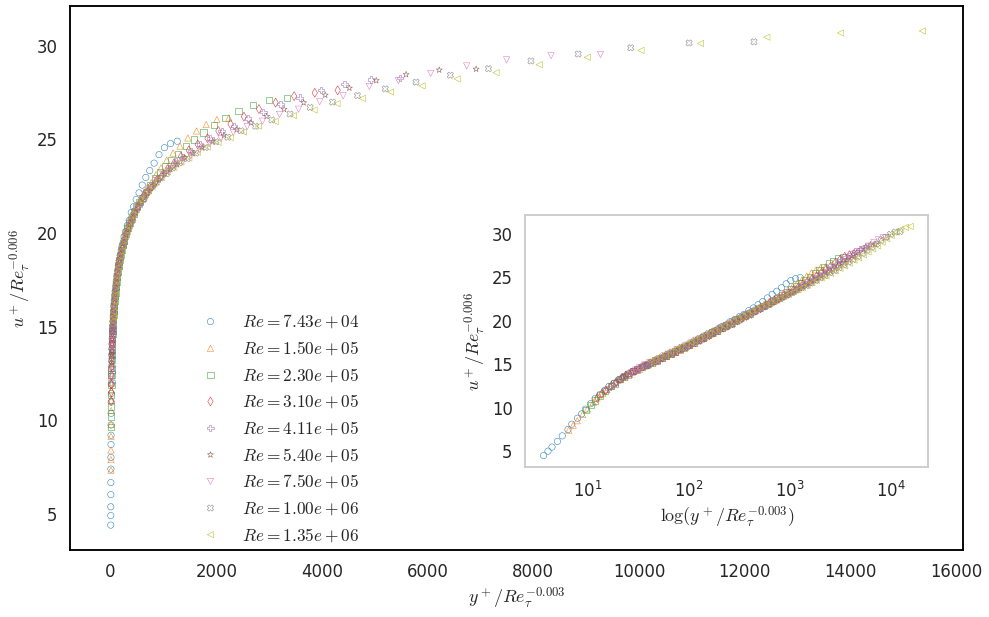

In [8]:
fig, ax1 = plt.subplots(figsize=(16, 10))

left, bottom, width, height = [0.52, 0.24, 0.35, 0.35] 
ax2 = fig.add_axes([left, bottom, width, height])

colors = matplotlib.cm.tab10(np.linspace(0, 1, 10))
markers=['o','^','s','d','P','*','v','X','<']
line_width = 0.5

j=0
for i in range(len(dfs)):
    ax1.scatter(y__[i][:-1] , u__[i][:-1] , s=40 , linewidth = line_width , facecolors='none', color = colors[i], marker = markers[j%len(markers)], label = r'$Re= $'+r'${:.2e}$'.format(Re[i]))
    j+=1

j=0
for i in range(len(dfs)):
    ax2.scatter(y__[i][:-1] , u__[i][:-1] , s=40 , linewidth = line_width, facecolors = 'none', color = colors[i] , marker = markers[j%len(markers)], label = 'Mck, Re= '+'{:.2e}'.format(Re[i]))
    j+=1

font = font_manager.FontProperties(family='DejaVu Sans',
                                   weight='roman',
                                   style='normal', size = 'xx-large', stretch = 'ultra-condensed')

ax1.legend(bbox_to_anchor=(0.13, 0.45), loc = 'upper left', edgecolor = 'white', framealpha = 0, prop = font, borderaxespad=0.)
ax1.set_xlabel(r"$y^+/Re_\tau^{-0.003}$")
ax1.set_ylabel(r'$u^+/Re_\tau^{-0.006}$')
#ax1.set_ylim([2,15])
ax1.grid(False)
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
ax2.set_xlabel(r"$\log(y^+/Re_\tau^{-0.003})$")
ax2.set_ylabel(r'$u^+/Re_\tau^{-0.006}$')
ax2.set_xscale('log')
#ax2.set_xlim([0.01,1])
ax2.grid(False)
plt.savefig('Figures/BarenNet exponents for log layer (Low Reynolds).pdf', format='pdf', dpi=1200)
plt.show()

## Now for High Reynolds

In [11]:
dfs = [dfSB2M300k_M, dfSB3M_M, dfSB4M_M, dfSB6M_M, dfSB7M_M, dfSB10M_M, dfSB13M_M]
Re_tau = []
Y_ = []
U_ = []
possible_re_tau = [4.229500e+004, 5.453000e+004, 7.647800e+004, 1.022e+005, 1.279200e+005, 1.657e+005, 2.169800e+005]
dic_x = {}
dic_y = {}
test = []

for i in range(len(possible_re_tau)):
    possible_y = dfs[i]["y+"].values
    possible_u = dfs[i]["U+"].values
    for j in range(len(possible_y)):                                                                    
        if 1000 < possible_y[j] < 0.1 * possible_re_tau[i]:              ### REGION WE WILL LOOK FOR LOG LAYER
            test.append(possible_re_tau[i])
            Y_.append(possible_y[j])
            U_.append(possible_u[j])
            Re_tau.append(possible_re_tau[i])

c = list(zip(Y_, Re_tau, U_))
random.shuffle(c)
Y_, Re_tau, U_ = zip(*c)

Y_ = np.log(Y_)
Re_tau = np.log(Re_tau)

dic_x['y+'] = Y_
dic_x['re_tau'] = Re_tau
dic_y['u+'] = np.array(U_)

nonsimilar_keys = ['y+']

xtrain = pd.DataFrame.from_dict(dic_x).values
ytrain = pd.DataFrame.from_dict(dic_y).values
print(len(test))

151


In [12]:
loss = 'mean_squared_error'
optimizer = 'adam'
best_loss = 50.0
n_fits = 20                      # Number of model fits we will try to perform
n_epochs_initial = 100           # Number of epochs we will train inside the loop
n_epochs_final = 10000            # Number of epochs we will train after convergence is established
successfull_tries = 0
models = []

# model = Create_Similarity_Model(n_nonsimilar = n_nonsimilar, n_similar = n_similar)
# model.compile(loss = loss, optimizer = optimizer)
# model.fit(xtrain, ytrain, epochs = n_epochs_initial, verbose = 2)

while successfull_tries < n_fits:
    model = Create_Similarity_Model(n_nonsimilar = n_nonsimilar, n_similar = n_similar)
    model.compile(loss = loss, optimizer = optimizer)
    model.fit(xtrain, ytrain, epochs = n_epochs_initial, verbose = 0)
    current_loss = model.evaluate(xtrain, ytrain, verbose = 0)
    if current_loss < 100:
        successfull_tries += 1
        model.fit(xtrain, ytrain, epochs = n_epochs_final, verbose = 0)
        good_loss = model.evaluate(xtrain, ytrain, verbose = 0)
        models.append(model)
        print("Iteration " + str(successfull_tries) + ": current loss = " + str(good_loss))
        if good_loss < best_loss:
            best_model = model
            best_loss = good_loss

2022-07-21 15:40:21.629092: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-21 15:40:21.629281: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-21 15:40:21.629331: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-07-21 15:40:21.629375: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-07-21 15:40:21.629415: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

KeyboardInterrupt: 

In [40]:
#best_model.fit(xtrain, ytrain, epochs = 1000, verbose = 2)
best_model.evaluate(xtrain, ytrain, verbose = 0)

0.003390453290194273

In [41]:
j = 0

for model in models:

    for i in range(n_nonsimilar):
        similarity_exponents = model.get_layer('similarity_layer_' + str(i+1)).weights[0][0].numpy()
        print('Exponents multiplicating inside the function for model ' + str(j) + ' in ' + nonsimilar_keys[i] + ': ' + str(similarity_exponents))

    multiplication_exponents = model.get_layer('multiplication_layer').weights[0][0].numpy()
    print('Exponents multiplicating outside the function for model ' + str(j) + ': '  + str(multiplication_exponents))
    j += 1

for i in range(n_nonsimilar):
    similarity_exponents = best_model.get_layer('similarity_layer_' + str(i+1)).weights[0][0].numpy()
    print('Exponents multiplicating inside the function for  best model: ' + nonsimilar_keys[i] + ': ' + str(similarity_exponents))

multiplication_exponents = best_model.get_layer('multiplication_layer').weights[0][0].numpy()
print('Exponents multiplicating outside the function for best model: '  + str(multiplication_exponents))

Exponents multiplicating inside the function for model 0 in y+: [-0.5871718]
Exponents multiplicating outside the function for model 0: [0.06496375]
Exponents multiplicating inside the function for model 1 in y+: [-0.62733865]
Exponents multiplicating outside the function for model 1: [0.07023128]
Exponents multiplicating inside the function for model 2 in y+: [0.08252399]
Exponents multiplicating outside the function for model 2: [-0.93348193]
Exponents multiplicating inside the function for model 3 in y+: [-0.12969789]
Exponents multiplicating outside the function for model 3: [0.00028725]
Exponents multiplicating inside the function for model 4 in y+: [-0.97189194]
Exponents multiplicating outside the function for model 4: [0.11565419]
Exponents multiplicating inside the function for model 5 in y+: [-0.24850427]
Exponents multiplicating outside the function for model 5: [0.01978994]
Exponents multiplicating inside the function for model 6 in y+: [-0.51761454]
Exponents multiplicatin

In [9]:
scaling_factor_y = -similarity_exponents
scaling_factor_u = multiplication_exponents

y__ = []
u__ = []
Re_tau = possible_re_tau
Re = [2.36e+006, 3.11e+006, 4.46e+006, 6.11e+006, 7.81e+006, 1.03e+007, 1.37e+007]

for i in range(len(dfs)):
    yplus = dfs[i]['y+']
    uplus = dfs[i]['U+']
    y__.append(yplus / (Re_tau[i] ** scaling_factor_y))
    u__.append(uplus / (Re_tau[i] ** scaling_factor_u))

NameError: name 'similarity_exponents' is not defined

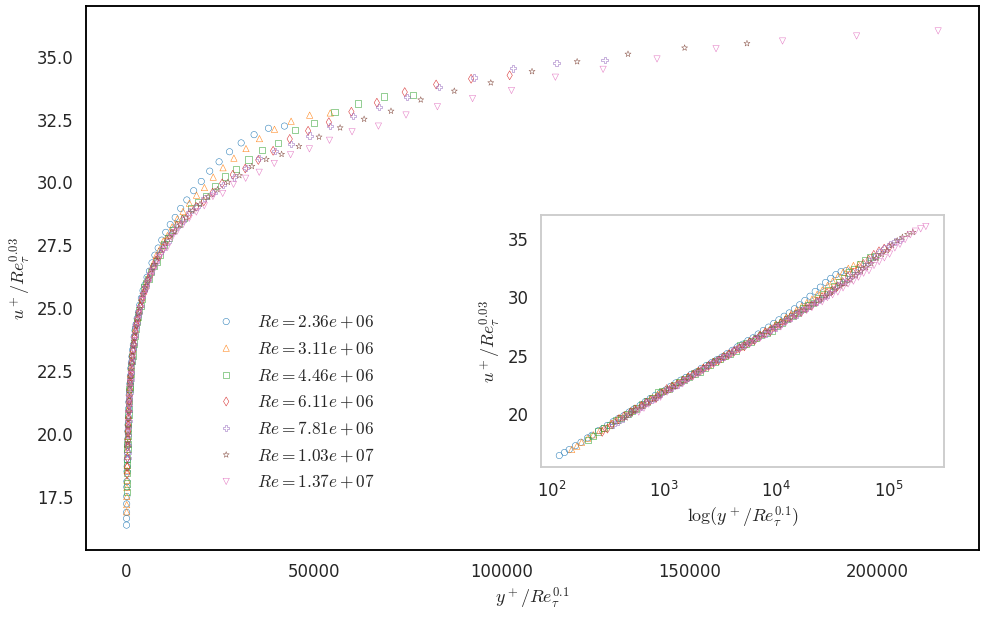

In [10]:
fig, ax1 = plt.subplots(figsize=(16, 10))

left, bottom, width, height = [0.52, 0.24, 0.35, 0.35] 
ax2 = fig.add_axes([left, bottom, width, height])

colors = matplotlib.cm.tab10(np.linspace(0, 1, 10))
markers=['o','^','s','d','P','*','v','X','<']
line_width = 0.5

j=0
for i in range(len(dfs)):
    ax1.scatter(y__[i][:-1] , u__[i][:-1] , s=40 , linewidth = line_width , facecolors='none', color = colors[i], marker = markers[j%len(markers)], label = r'$Re= $'+r'${:.2e}$'.format(Re[i]))
    j+=1

j=0
for i in range(len(dfs)):
    ax2.scatter(y__[i][:-1] , u__[i][:-1] , s=40 , linewidth = line_width, facecolors = 'none', color = colors[i] , marker = markers[j%len(markers)], label = 'Mck, Re= '+'{:.2e}'.format(Re[i]))
    j+=1

font = font_manager.FontProperties(family='DejaVu Sans',
                                   weight='roman',
                                   style='normal', size = 'xx-large', stretch = 'ultra-condensed')

ax1.legend(bbox_to_anchor=(0.13, 0.45), loc = 'upper left', edgecolor = 'white', framealpha = 0, prop = font, borderaxespad=0.)
ax1.set_xlabel(r"$y^+/Re_\tau^{0.1}$")
ax1.set_ylabel(r'$u^+/Re_\tau^{0.03}$')
#ax1.set_ylim([2,15])
ax1.grid(False)
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
ax2.set_xlabel(r"$\log(y^+/Re_\tau^{0.1})$")
ax2.set_ylabel(r'$u^+/Re_\tau^{0.03}$')
ax2.set_xscale('log')
#ax2.set_xlim([0.01,1])
ax2.grid(False)
#plt.savefig('Figures/BarenNet exponents for log layer (High Reynolds).pdf', format='pdf', dpi=1200)

## Reproducing Bailey

In [36]:
dfs = [dfSB75k_M, dfSB150k_M, dfSB230k_M, dfSB310k_M, dfSB410k_M, dfSB540k_M, dfSB750k_M, dfSB1M_M, dfSB1M300k_M, dfSB1M700k_M, dfSB2M300k_M, dfSB3M_M, dfSB4M_M, dfSB6M_M, dfSB7M_M, dfSB10M_M, dfSB13M_M]
Re_tau = []
Y_ = []
U_ = []
possible_re_tau = [1824.7, 3327.4, 5108.6, 6617.4, 8536.6, 10914.0, 14849.0, 19778.0, 25278.0, 32869.0, 4.229500e+004, 5.453000e+004, 7.647800e+004, 1.022e+005, 1.279200e+005, 1.657e+005, 2.169800e+005]
dic_x = {}
dic_y = {}
test = []

for i in range(len(possible_re_tau)):
    possible_y = dfs[i]["y+"].values
    possible_u = dfs[i]["U+"].values
    for j in range(len(possible_y)):                                                                    
        if 1000 < possible_y[j] < 0.06 * possible_re_tau[i]:              ### REGION WE WILL LOOK FOR LOG LAYER
            test.append(possible_re_tau[i])
            Y_.append(possible_y[j])
            U_.append(possible_u[j])
            Re_tau.append(possible_re_tau[i])

c = list(zip(Y_, Re_tau, U_))
random.shuffle(c)
Y_, Re_tau, U_ = zip(*c)

Y_ = np.log(Y_)
Re_tau = np.log(Re_tau)

dic_x['y+'] = Y_
dic_x['re_tau'] = Re_tau
dic_y['u+'] = np.array(U_)

nonsimilar_keys = ['y+']

xtrain = pd.DataFrame.from_dict(dic_x).values
ytrain = pd.DataFrame.from_dict(dic_y).values
print(len(test))

128


In [37]:
loss = 'mean_squared_error'
optimizer = 'adam'
best_loss = 50.0
n_fits = 20                      # Number of model fits we will try to perform
n_epochs_initial = 100          # Number of epochs we will train inside the loop
n_epochs_final = 10000            # Number of epochs we will train after convergence is established
successfull_tries = 0
models = []

# model = Create_Similarity_Model(n_nonsimilar = n_nonsimilar, n_similar = n_similar)
# model.compile(loss = loss, optimizer = optimizer)
# model.fit(xtrain, ytrain, epochs = n_epochs_initial, verbose = 2)

while successfull_tries < n_fits:
    model = Create_Similarity_Model(n_nonsimilar = n_nonsimilar, n_similar = n_similar)
    model.compile(loss = loss, optimizer = optimizer)
    model.fit(xtrain, ytrain, epochs = n_epochs_initial, verbose = 0)
    current_loss = model.evaluate(xtrain, ytrain, verbose = 0)
    if current_loss < 100:
        successfull_tries += 1
        model.fit(xtrain, ytrain, epochs = n_epochs_final, verbose = 0)
        good_loss = model.evaluate(xtrain, ytrain, verbose = 0)
        models.append(model)
        print("Iteration " + str(successfull_tries) + ": current loss = " + str(good_loss))
        if good_loss < best_loss:
            best_model = model
            best_loss = good_loss

Iteration 1: current loss = 0.007675610948354006
Iteration 2: current loss = 0.005554969888180494
Iteration 3: current loss = 0.004821170121431351
Iteration 4: current loss = 0.011191518977284431
Iteration 5: current loss = 0.005188711453229189
Iteration 6: current loss = 0.011735333129763603
Iteration 7: current loss = 0.006609710399061441


KeyboardInterrupt: 

In [38]:
# model.fit(xtrain, ytrain, epochs = n_epochs_initial, verbose = 2)
# best_model = model
#best_model.fit(xtrain, ytrain, epochs = 1000, verbose = 2)
best_model.evaluate(xtrain, ytrain, verbose = 0)

0.004821170121431351

In [39]:
j = 0

for model in models:

    for i in range(n_nonsimilar):
        similarity_exponents = model.get_layer('similarity_layer_' + str(i+1)).weights[0][0].numpy()
        print('Exponents multiplicating inside the function for model ' + str(j) + ' in ' + nonsimilar_keys[i] + ': ' + str(similarity_exponents))

    multiplication_exponents = model.get_layer('multiplication_layer').weights[0][0].numpy()
    print('Exponents multiplicating outside the function for model ' + str(j) + ': '  + str(multiplication_exponents))
    j += 1

for i in range(n_nonsimilar):
    similarity_exponents = best_model.get_layer('similarity_layer_' + str(i+1)).weights[0][0].numpy()
    print('Exponents multiplicating inside the function for  best model: ' + nonsimilar_keys[i] + ': ' + str(similarity_exponents))

multiplication_exponents = best_model.get_layer('multiplication_layer').weights[0][0].numpy()
print('Exponents multiplicating outside the function for best model: '  + str(multiplication_exponents))

Exponents multiplicating inside the function for model 0 in y+: [-0.7920952]
Exponents multiplicating outside the function for model 0: [0.07507711]
Exponents multiplicating inside the function for model 1 in y+: [-0.7057207]
Exponents multiplicating outside the function for model 1: [0.06709335]
Exponents multiplicating inside the function for model 2 in y+: [-0.3948146]
Exponents multiplicating outside the function for model 2: [0.03663262]
Exponents multiplicating inside the function for model 3 in y+: [-0.9114166]
Exponents multiplicating outside the function for model 3: [0.0862125]
Exponents multiplicating inside the function for model 4 in y+: [-0.52811795]
Exponents multiplicating outside the function for model 4: [0.0499236]
Exponents multiplicating inside the function for model 5 in y+: [-0.79914564]
Exponents multiplicating outside the function for model 5: [0.07586321]
Exponents multiplicating inside the function for model 6 in y+: [-0.90039474]
Exponents multiplicating out